# Imports

In [167]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold, cross_validate, LeaveOneOut, train_test_split, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, VarianceThreshold, chi2, SelectKBest, RFECV
import time
import numpy as np
import matplotlib.pyplot as plt

# Read data in

In [3]:
# read from csv
data_df = pd.read_csv('./data/eig_centrality.csv', header=None)
# drop columns with zeros
data_df = data_df.loc[:, (data_df != 0).any(axis=0)]
data_df.head(20)

,0,1,2,6,7,10,12,13,14,15,...,285,286,287,288,289,290,291,292,293,294
0,1,-0.067894,-0.062832,-0.031240,-0.071004,-0.030888,0.009534,0.044660,0.043163,0.025440,...,-0.112760,-0.106070,0.000000e+00,0.000000e+00,-0.028195,-0.024616,-0.042535,-0.087451,0.003145,-0.047196
1,1,0.031793,0.025996,0.122030,0.109220,-0.005733,0.017223,-0.072822,-0.077072,-0.126650,...,0.078364,0.049836,0.000000e+00,6.938900e-18,-0.076947,-0.078418,-0.064815,0.095082,0.054585,0.076347
2,1,-0.005251,-0.015806,-0.124040,-0.117020,-0.017355,-0.035984,0.106950,0.011851,0.077032,...,0.021125,0.014470,0.000000e+00,-1.734700e-18,0.068705,0.084321,0.047107,0.004649,-0.142760,-0.129450
3,1,0.123150,0.096576,-0.045236,-0.005143,-0.017959,-0.060064,0.008232,-0.076910,-0.042061,...,-0.043127,-0.024063,5.551100e-17,-1.110200e-16,-0.064510,-0.100380,-0.112950,-0.099919,-0.006036,-0.004228
4,1,-0.059846,-0.024500,-0.022105,0.022153,0.079495,-0.013115,0.019867,0.032033,0.012232,...,-0.026404,-0.004397,-4.336800e-19,0.000000e+00,-0.068379,0.006091,-0.050172,0.056009,0.077894,0.016500
5,1,-0.047201,-0.023249,0.107190,0.117740,-0.010293,-0.040863,-0.098316,-0.047187,-0.101880,...,-0.047042,-0.084535,0.000000e+00,0.000000e+00,-0.095798,-0.073266,-0.094619,0.084386,0.081942,0.105320
6,1,-0.089435,-0.080275,0.001140,-0.014447,0.027198,-0.026102,0.116720,0.049616,0.060910,...,-0.005671,-0.003008,0.000000e+00,0.000000e+00,-0.009444,0.036900,-0.022935,0.029724,-0.020147,-0.023445
7,1,-0.092537,0.003668,-0.129430,-0.107730,0.088690,0.042226,0.059388,0.037930,0.075362,...,-0.015637,0.001023,2.168400e-19,0.000000e+00,0.038453,0.111860,0.055049,-0.015476,-0.125960,-0.093968
8,1,0.022265,0.048711,0.048122,0.032252,0.037123,-0.059852,0.011789,-0.071290,-0.109800,...,-0.021779,-0.004315,2.710500e-20,0.000000e+00,-0.099726,-0.076015,-0.106140,-0.054908,0.038627,0.040091
9,1,-0.111080,-0.023740,-0.027010,-0.011543,0.089719,0.020014,0.013929,0.058090,0.067178,...,0.011984,0.053828,-6.938900e-18,-2.775600e-17,0.059277,0.059997,0.101670,0.027837,0.029670,0.012809


## Pull X and y from dataframe

In [199]:
X = abs(data_df.iloc[:, 1:]) # take the absolute value
y = data_df.iloc[:,0]

print(X.shape)
print(y.shape)

(60, 273)
(60,)


# Forward Selection

In [72]:
# Init model
clf = svm.SVC(C=1000, gamma='auto')

# Get num features desired
num_features = data_df.shape[1] - 1 # get total number of features
num_features_del = 5 # number of features to take off
final_features = num_features - num_features_del # final number of features in the model
print(f'final features: {final_features}')

# Call sequential features selector
sfs = SequentialFeatureSelector(clf, n_features_to_select=final_features, cv=10, direction='forward')

# Fit the model
sfs.fit(X,y)

final features: 268


SequentialFeatureSelector(cv=10, estimator=SVC(C=1000, gamma='auto'),
                          n_features_to_select=268)

In [73]:
sfs.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [74]:
# Get index of features that were dropped
dropped_features = np.where(sfs.get_support() == False)[0]
print(dropped_features)

[185 194 234 236 240]


## View dropped features

In [75]:
## Create empty dict for storing results
dropped_dict = {}
for index in dropped_features:
    sample_points = X[index]
    dropped_dict[index] = sample_points

## Verify this works correctly
print(dropped_dict.keys())

dict_keys([185, 194, 234, 236, 240])


In [56]:
## Create an empty data frame for easy usage
pd.DataFrame(dropped_dict).head(60)

,144,155,194,197,243
0,0.009374,0.004708,0.045112,0.025727,0.083662
1,0.002818,0.005332,0.028392,0.009401,0.004550
2,0.034402,0.028343,0.039744,0.021268,0.082136
3,0.038833,0.112050,0.014235,0.023948,0.040527
4,0.029390,0.124250,0.073083,0.064858,0.001888
5,0.002788,0.012017,0.038674,0.035372,0.058978
6,0.010980,0.064797,0.024266,0.039258,0.030792
7,0.000276,0.002665,0.045647,0.040691,0.037514
8,0.081128,0.061879,0.037151,0.090069,0.067636
9,0.031749,0.037143,0.138010,0.000997,0.012898


## Transform data to drop these features

In [76]:
## Transform data from sfs
X_new = sfs.transform(X)
### Verify transformation
print(X.shape[1] - len(dropped_features)) # num features that should be left
print(X_new.shape[1])

268
268


## Train new model

In [77]:
clf = svm.SVC(C=1000, gamma='auto')
loo = LeaveOneOut()
results_cv = cross_validate(clf, X, y, cv=loo, return_train_score=True)

In [78]:
print(np.mean(results_cv['train_score']))
print(np.mean(results_cv['test_score']))

0.9833333333333333
0.5333333333333333


# Function for forward and backwards

In [16]:
def feature_selection(X, y, model, direction='forward',
                     features_dropped = 10, cv_sfs=10, cv_train=10, notes=None):
    print('####################')
    print('Begin Feature Selection')
    print('####################')

    # Create a model for sfs and training
    model_sfs = model
    model_train = model

    # Get length of data for final num features
    num_features = X.shape[1] # get total number of features
    final_features = num_features - features_dropped # final number of features in the model
    print(f'final features: {final_features}')

    # Call sequential features selector
    sfs = SequentialFeatureSelector(model_sfs, n_features_to_select=final_features, cv=cv_sfs, direction=direction)
    sfs.fit(X,y)
    
    # Get the dropped features
    dropped_features = np.where(sfs.get_support() == False)[0]
    print(f'Dropped Features: {dropped_features}')

    # Transform data and train a model
    X_new = sfs.transform(X)

    # Train SVM model
    print('-----------------')
    print(f'{model_train} being used')
    results = cross_validate(model_train, X_new, y, cv=cv_train, return_train_score=True)
    train_score = results['train_score']
    test_score = results['test_score']
    test_min = min(test_score)
    test_avg = np.mean(test_score)
    test_max = max(test_score)
    print(f'train scores: {train_score}')
    print(f'test scores: {test_score}')
    print('-----------------')

    ## Create a dict to store results (makes dataframes easier)
    results_dict = {
                    'model': str(model),
                    'direction': direction,
                    'features_dropped': [dropped_features],
                    'final_num_features': final_features,
                    'train_scores': [train_score.round(3)],
                    'test_scores': [test_score.round(3)],
                    'min_test': test_min,
                    'avg_test': test_avg,
                    'max_test': test_max,
                    'notes': notes,
                    }
                    
    # results_df = pd.DataFrame(results_dict)

    return(results_dict)

In [18]:
all_results = []
for x in [30,60,90]:
    results = feature_selection(X, y, model=svm.SVC(C=1000, gamma='auto'), features_dropped=x)
    print(results)
    all_results.append(results)
    

####################
Begin Feature Selection
####################
final features: 243
Dropped Features: [ 15 104 113 149 150 152 154 159 168 178 185 188 194 200 202 203 208 211
 213 215 221 234 236 237 240 249 258 262 263 270]
-----------------
SVC(C=1000, gamma='auto') being used
train scores: [0.96296296 0.98148148 0.96296296 0.96296296 0.96296296 0.96296296
 0.96296296 0.96296296 0.98148148 0.96296296]
test scores: [0.66666667 0.5        0.83333333 0.33333333 0.83333333 0.66666667
 0.5        0.5        0.66666667 0.66666667]
-----------------
{'model': "SVC(C=1000, gamma='auto')", 'direction': 'forward', 'features_dropped': [array([ 15, 104, 113, 149, 150, 152, 154, 159, 168, 178, 185, 188, 194,
       200, 202, 203, 208, 211, 213, 215, 221, 234, 236, 237, 240, 249,
       258, 262, 263, 270])], 'final_num_features': 243, 'train_scores': [array([0.963, 0.981, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.981,
       0.963])], 'test_scores': [array([0.667, 0.5  , 0.833, 0.333, 0.833, 

# Experiment with methods needed to do exhaustive training

In [15]:
# Iterrate over the data frame for many X and y
num_features = data_df.shape[1] - 1 # get total number of features
num_features_del = 5 # number of features to take off
final_features = num_features - num_features_del # final number of features in the model
print(final_features)

289


# Removing Features with Low variance

In [51]:
sel = VarianceThreshold(threshold=(0.001*(1-0.001)))
X_new = sel.fit_transform(X)
X_new.shape

(60, 136)

In [52]:
SVM = svm.SVC(C=1000, gamma='auto')
k_fold = KFold(n_splits = 10, shuffle=True)
loo = LeaveOneOut()
results = cross_validate(SVM, X_new, y, cv=k_fold, return_train_score=True)
results

{'fit_time': array([0.00172806, 0.00099087, 0.00085092, 0.00076079, 0.00086808,
        0.0008409 , 0.00074506, 0.0007329 , 0.0007658 , 0.00078392]),
 'score_time': array([0.00040507, 0.00031495, 0.00027418, 0.00024509, 0.00025988,
        0.00027585, 0.0002377 , 0.00023127, 0.00029016, 0.00022817]),
 'test_score': array([0.33333333, 0.5       , 0.66666667, 0.16666667, 0.5       ,
        0.66666667, 0.16666667, 0.33333333, 0.16666667, 0.5       ]),
 'train_score': array([0.94444444, 0.92592593, 0.88888889, 0.94444444, 0.90740741,
        0.90740741, 0.94444444, 0.94444444, 0.90740741, 0.94444444])}

In [53]:
print(np.mean(results['test_score']))

0.39999999999999997


In [54]:
k_fold = KFold(n_splits = 10, shuffle=True)
loo = LeaveOneOut()
for thresh in [0.0005, 0.00075, 0.001, 0.001125, 0.00125]:
    SVM = svm.SVC(C=1000, gamma='auto')
    print(f'thresh: {thresh}')
    sel = VarianceThreshold(threshold=thresh)
    X_new = sel.fit_transform(X)
    print(X_new.shape)
    
    results = cross_validate(SVM, X_new, y, cv=loo, return_train_score=True)
    print(np.mean(results['test_score']))
    print('--------------------------')

thresh: 0.0005
(60, 267)
0.5166666666666667
--------------------------
thresh: 0.00075
(60, 235)
0.48333333333333334
--------------------------
thresh: 0.001
(60, 136)
0.43333333333333335
--------------------------
thresh: 0.001125
(60, 79)
0.45
--------------------------
thresh: 0.00125
(60, 37)
0.43333333333333335
--------------------------


# Select K Best

In [55]:
X_new = SelectKBest(chi2, k=60).fit_transform(X, y)
X_new.shape

(60, 60)

In [56]:
SVM = svm.SVC(C=1000, gamma='auto')
k_fold = KFold(n_splits = 10, shuffle=True)
loo = LeaveOneOut()
results = cross_validate(SVM, X_new, y, cv=k_fold, return_train_score=True)
results
'''
Most likely the results here are good because of overfitting and data leakage
'''

{'fit_time': array([0.00070906, 0.00052977, 0.00047898, 0.00038409, 0.00033879,
        0.00032902, 0.00032306, 0.00030398, 0.00035691, 0.00034809]),
 'score_time': array([0.00031805, 0.00018501, 0.00015807, 0.00013804, 0.00013494,
        0.00012898, 0.00013113, 0.00012708, 0.00014114, 0.0001328 ]),
 'test_score': array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 1.        ,
        1.        , 0.83333333, 0.33333333, 0.66666667, 0.66666667]),
 'train_score': array([0.96296296, 0.98148148, 0.92592593, 0.96296296, 0.94444444,
        0.94444444, 0.94444444, 0.96296296, 0.94444444, 0.94444444])}

In [153]:
# Test Train Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(48, 273)
(12, 273)


In [154]:
SVM = svm.SVC(C=1000, gamma='auto')
K_Best = SelectKBest(chi2, k=75)

In [155]:
K_Best.fit(X_train, y_train)
X_train_new = K_Best.transform(X_train)
X_test_new = K_Best.transform(X_test)
print(X_train_new.shape)
print(X_test_new.shape)

(48, 75)
(12, 75)


In [156]:
SVM.fit(X_train_new, y_train)
print(f'train score: {SVM.score(X_train_new, y_train)}')
print(f'test score: {SVM.score(X_test_new, y_test)}')

train score: 1.0
test score: 0.4166666666666667


# Recursive Feature elimination with cross validation

In [188]:
SVM = svm.SVC(C=1000, kernel='linear')
min_features_to_select = 29

In [189]:
rfecv = RFECV(
    estimator=SVM,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 111


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


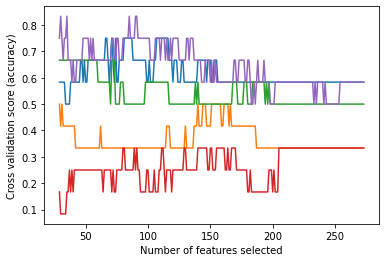

In [190]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [219]:
X_new = rfecv.transform(X)
SVM = svm.SVC(C=1000, gamma='auto')
k_fold = KFold(n_splits = 10, shuffle=True)
loo = LeaveOneOut()
results = cross_validate(SVM, X_new, y, cv=k_fold, return_train_score=True)
print(results)
print('test_score: ' +  str(np.mean(results['test_score'])))
'''
Test score is good because of data leakage
'''

{'fit_time': array([0.00079918, 0.00062895, 0.00063396, 0.00055599, 0.00056195,
       0.00055981, 0.00049734, 0.00052571, 0.00051403, 0.00049591]), 'score_time': array([0.00025487, 0.00019693, 0.00020099, 0.00018311, 0.00017381,
       0.00018096, 0.00015783, 0.00016522, 0.00015688, 0.00015998]), 'test_score': array([1.        , 1.        , 1.        , 1.        , 0.83333333,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
test_score: 0.9833333333333334


## Getting rid of that data leakage


In [231]:
# Test Train Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(48, 273)
(12, 273)


In [232]:
SVM = svm.SVC(C=1000, kernel='linear')
min_features_to_select=29
rfecv = RFECV(
    estimator=SVM,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

In [233]:
rfecv.fit(X_train, y_train)
X_train_new = rfecv.transform(X_train)
X_test_new = rfecv.transform(X_test)
print(X_train_new.shape)
print(X_test_new.shape)

(48, 29)
(12, 29)


In [234]:
SVM.fit(X_train_new, y_train)
print(f'train score: {SVM.score(X_train_new, y_train)}')
print(f'test score: {SVM.score(X_test_new, y_test)}')

train score: 1.0
test score: 0.5833333333333334
